In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
print(os.listdir("D:\comp_vision\malaria\cell_images"))

['main', 'Parasitized', 'Uninfected']


In [2]:
import cv2
import glob
labels=[]
data=[]
for img in glob.glob("D:/comp_vision/malaria/cell_images/Parasitized/*.png"):
    image= cv2.imread(img)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((50, 50))
    data.append(np.array(size_image))
    labels.append(1)
for img in glob.glob("D:/comp_vision/malaria/cell_images/Uninfected/*.png"):
    image= cv2.imread(img)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((50, 50))
    data.append(np.array(size_image))
    labels.append(0)

In [3]:
Cells=np.array(data)
labels=np.array(labels)

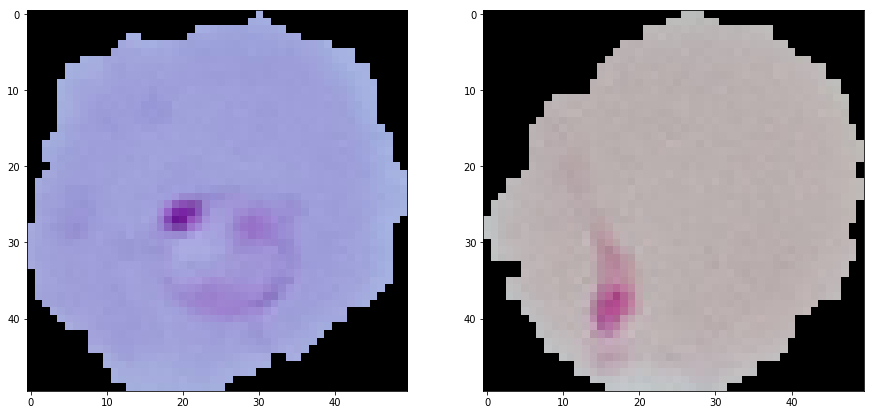

In [4]:
figure=plt.figure(figsize=(15,10))
ax=figure.add_subplot(121)
ax.imshow(Cells[0])
bx=figure.add_subplot(122)
bx.imshow(Cells[6000])

In [5]:
np.save("Cells",Cells)
np.save("labels",labels)

In [6]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [7]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [8]:
labels

array([1, 0, 0, ..., 0, 0, 1])

In [9]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [10]:
x_train,x_test=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [11]:
print(train_len,test_len)

24803 2755


In [12]:
y_train,y_test=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [14]:
import keras
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

C:\Users\SUNIL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.optimizers import RMSprop

In [33]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)         

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
24803/24803 [==============================] - 52s 2ms/step - loss: 0.4317 - accuracy: 0.7883
Epoch 2/20
24803/24803 [==============================] - 55s 2ms/step - loss: 0.1560 - accuracy: 0.9504 
Epoch 3/20
24803/24803 [==============================] - 40s 2ms/step - loss: 0.1390 - accuracy: 0.9551
Epoch 4/20
24803/24803 [==============================] - 40s 2ms/step - loss: 0.1291 - accuracy: 0.9575
Epoch 5/20
24803/24803 [==============================] - 41s 2ms/step - loss: 0.1198 - accuracy: 0.9606
Epoch 6/20
24803/24803 [==============================] - 42s 2ms/step - loss: 0.1105 - accuracy: 0.9625
Epoch 7/20
24803/24803 [==============================] - 43s 2ms/step - loss: 0.1043 - accuracy: 0.9642
Epoch 8/20
24803/24803 [==============================] - 43s 2ms/step - loss: 0.0981 - accuracy: 0.9642
Epoch 9/20
24803/24803 [==============================] - 42s 2ms/step - loss: 0.0915 - accuracy: 0.9682
Epoch 10/20
24803/24803 [=============================

In [36]:
accuracy = model.evaluate(x_test, y_test,verbose=1)
print('\n', 'Test_Accuracy=>', accuracy[1])

2755/2755 [==============================] - 1s 349us/step

 Test_Accuracy=> 0.957531750202179
